<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Clase_B_10_NOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*******************************
Historial de Costo:
Iteración 0 valores de x:12.464675711623228
Iteración 1 valores de x:0.07832562421148669
Iteración 2 valores de x:0.04248177241116922
Iteración 3 valores de x:0.023715120663952306
Iteración 4 valores de x:0.013620621554074045
Iteración 5 valores de x:0.008089373655761267
Iteración 6 valores de x:0.005018781839165566
Iteración 7 valores de x:0.0032981711702947535
Iteración 8 valores de x:0.0023274417595939866
Iteración 9 valores de x:0.0017770320610663501
Iteración 10 valores de x:0.0014637877085429876
Iteración 11 valores de x:0.0012850239265683346
Iteración 12 valores de x:0.0011827951377765087
Iteración 13 valores de x:0.0011242432754928798
Iteración 14 valores de x:0.0010906683225837316
Iteración 15 valores de x:0.0010713987261442332
Iteración 16 valores de x:0.001060332011598927
Iteración 17 valores de x:0.001053973093892004
Iteración 18 valores de x:0.0010503178785824414
Iteración 19 valores de x:0.0010482161924903525
Iteración 2

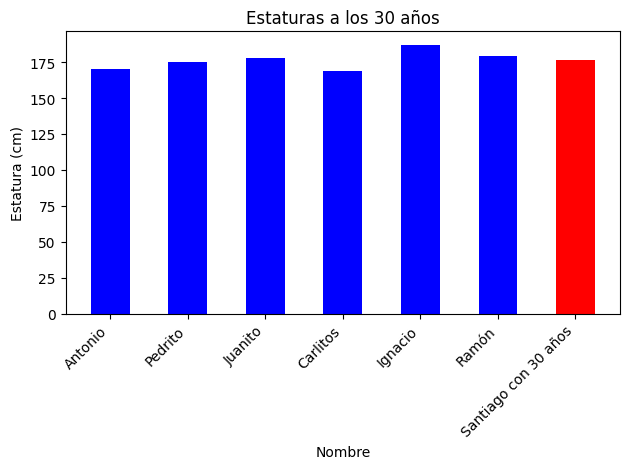

In [13]:



from numpy.lib.function_base import append
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (edad en años)
edades = np.array([30, 30, 30, 30, 30, 30])
# Datos de salida (estatura en cm)
estaturas = np.array([170, 175, 178, 169, 187, 179])

# Normalizar las edades y estaturas (opcional, pero puede ayudar en el entrenamiento)
edades_norm = edades / np.max(edades)
estaturas_norm = estaturas / np.max(estaturas)

# Número de neuronas en cada capa
input_size = 1
hidden_layer1_size = 8
hidden_layer2_size = 8
output_size = 1

# Inicialización de pesos y sesgos
np.random.seed(42)
weights_input_hidden1 = np.random.randn(input_size, hidden_layer1_size)
biases_hidden1 = np.zeros((1, hidden_layer1_size))
weights_hidden1_hidden2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
biases_hidden2 = np.zeros((1, hidden_layer2_size))
weights_hidden2_output = np.random.randn(hidden_layer2_size, output_size)
biases_output = np.zeros((1, output_size))

# Hiperparámetros
learning_rate = 0.01
epochs = 100

# Función de activación ReLU
def relu(x):
    return np.maximum(0, x)

# Derivada de la función de activación ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
costo_historia = []
# Entrenamiento de la red neuronal
for epoch in range(epochs):
    # Propagación hacia adelante
    hidden1_input = np.dot(edades_norm.reshape(-1, 1), weights_input_hidden1) + biases_hidden1
    hidden1_output = relu(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + biases_hidden2
    hidden2_output = relu(hidden2_input)
    output = np.dot(hidden2_output, weights_hidden2_output) + biases_output

    # Calcular la pérdida
    loss = np.mean((output - estaturas_norm.reshape(-1, 1)) ** 2)
    costo_historia.append(loss)
    # Propagación hacia atrás
    output_gradient = 2 * (output - estaturas_norm.reshape(-1, 1)) / len(estaturas_norm)
    hidden2_gradient = output_gradient.dot(weights_hidden2_output.T) * relu_derivative(hidden2_input)
    hidden1_gradient = hidden2_gradient.dot(weights_hidden1_hidden2.T) * relu_derivative(hidden1_input)

    # Actualización de pesos y sesgos
    weights_hidden2_output -= learning_rate * hidden2_output.T.dot(output_gradient)
    biases_output -= learning_rate * np.sum(output_gradient, axis=0, keepdims=True)
    weights_hidden1_hidden2 -= learning_rate * hidden1_output.T.dot(hidden2_gradient)
    biases_hidden2 -= learning_rate * np.sum(hidden2_gradient, axis=0, keepdims=True)
    weights_input_hidden1 -= learning_rate * edades_norm.reshape(-1, 1).T.dot(hidden1_gradient)
    biases_hidden1 -= learning_rate * np.sum(hidden1_gradient, axis=0, keepdims=True)

# Predecir la estatura de Santiago a los 30 años (Santiaguito)
santiaguito_edad = np.array([30])
santiaguito_edad_norm = santiaguito_edad / np.max(edades)
hidden1_input = np.dot(santiaguito_edad_norm.reshape(-1, 1), weights_input_hidden1) + biases_hidden1
hidden1_output = relu(hidden1_input)
hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + biases_hidden2
hidden2_output = relu(hidden2_input)
santiaguito_estatura_norm = np.dot(hidden2_output, weights_hidden2_output) + biases_output

# Desnormalizar la estatura de Santiaguito
santiaguito_estatura = santiaguito_estatura_norm * np.max(estaturas)

#print("La previsión de estatura de Santiaguito a los 30 años es:", santiaguito_estatura[0][0], "cm")

# Datos para la gráfica de columnas
nombres = ['Antonio', 'Pedrito', 'Juanito', 'Carlitos', 'Ignacio', 'Ramón', 'Santiago con 30 años']
estaturas_todos = np.append(estaturas, santiaguito_estatura[0][0])
colores = ['blue'] * len(estaturas) + ['red']

# Ajustar el ancho de las columnas
ancho_columnas = 0.5
print("*******************************")
print("Historial de Costo:")
for index, misxvalues in enumerate(costo_historia):
  print(f'Iteración {index} valores de x:{misxvalues}')
print("*******************************")
print("La previsión de estatura de Santiaguito a los 30 años es:", santiaguito_estatura[0][0], "cm")
print("*******************************")
# Graficar la gráfica de columnas
plt.bar(np.arange(len(nombres)), estaturas_todos, color=colores, width=ancho_columnas)
plt.xticks(np.arange(len(nombres)), nombres, rotation=45, ha='right')
plt.title('Estaturas a los 30 años')
plt.xlabel('Nombre')
plt.ylabel('Estatura (cm)')
plt.tight_layout()
plt.show()
